In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math

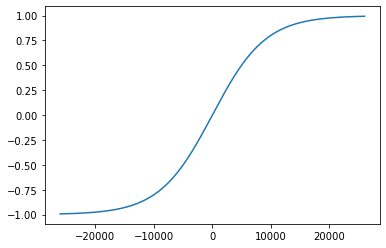

0.8338114583937841
0.8013597307221021
0.5014193397349239
0.4144401281370427
0.3191677917285291
0.21697566088633036
0.10979566068911578
-0.0
-0.10979566068911578


In [14]:
off_change = 1.3
ex_origin_price = 20000

X = np.arange(ex_origin_price * (-off_change), ex_origin_price * (off_change))
y = np.tanh(X / 10 / (ex_origin_price * off_change) * 180/6.28)

plt.plot(X, y)
plt.show()

def get_tendency_value_of_price(price, origin_price):
    tendency = -math.tanh((price - origin_price) / 10 / (origin_price * off_change) * 180 / 6.28)
    if tendency < -0.95:
        return -1
    elif tendency > 0.95:
        return 1
    return tendency
print(get_tendency_value_of_price(911, 2000))
print(get_tendency_value_of_price(10000, 20000))
print(get_tendency_value_of_price(15000, 20000))
print(get_tendency_value_of_price(16000, 20000))
print(get_tendency_value_of_price(17000, 20000))
print(get_tendency_value_of_price(18000, 20000))
print(get_tendency_value_of_price(19000, 20000))
print(get_tendency_value_of_price(20000, 20000))
print(get_tendency_value_of_price(21000, 20000))

In [171]:
def get_tendency_value_of_ahead(ahead, max_ahead, min_ahead):
    if abs(ahead) < 10 and random.randint(0, 10) > 3:
        return 1
    return -0.3

In [172]:
def get_tendency_value_of_quantity(quantity, store_quantity, auto_stock_amount):
    if quantity < store_quantity:
        return 1
    if store_quantity == 0 and quantity < auto_stock_amount / 2:
        return 1
    
    if quantity < 3:
        return 0.3
    
    if quantity > 5 and quantity > auto_stock_amount * 3 / 4:
        if random.randint(0, 10) > 7:
            return 0.5
        else:
            return -2
    return 0

In [173]:
products = pd.read_csv("product.csv")
products.describe()

,id,category_id,jan,isbn,mpn,location,quantity,stock_status_id,manufacturer_id,price,...,status,viewed,deleted_at,amount,power,origin_price,change_amount,range_quantity,auto_stock_amount,image_profit
count,73.000000,73.000000,0.0,0.0,0.0,0.0,73.000000,13.0,57.000000,73.000000,...,73.0,73.0,0.0,60.0,60.000000,73.000000,73.000000,73.000000,73.000000,0.0
mean,10822.219178,33.506849,NaN,NaN,NaN,NaN,3.123288,0.0,7.894737,4843.849315,...,1.0,0.0,NaN,0.0,33.333333,5282.191781,243.821918,21.410959,90.232877,NaN
std,122.637706,4.187028,NaN,NaN,NaN,NaN,23.282054,0.0,4.113064,11036.657598,...,0.0,0.0,NaN,0.0,258.198890,9706.102640,545.643793,37.261402,156.233845,NaN
min,10498.000000,27.000000,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,121.000000,...,1.0,0.0,NaN,0.0,0.000000,200.000000,2.000000,0.000000,1.000000,NaN
25%,10837.000000,29.000000,NaN,NaN,NaN,NaN,0.000000,0.0,10.000000,516.000000,...,1.0,0.0,NaN,0.0,0.000000,700.000000,16.000000,0.000000,4.000000,NaN
50%,10861.000000,33.000000,NaN,NaN,NaN,NaN,0.000000,0.0,10.000000,978.000000,...,1.0,0.0,NaN,0.0,0.000000,1250.000000,30.000000,4.000000,23.000000,NaN
75%,10889.000000,36.000000,NaN,NaN,NaN,NaN,0.000000,0.0,10.000000,3320.000000,...,1.0,0.0,NaN,0.0,0.000000,5000.000000,160.000000,20.000000,67.000000,NaN
max,10908.000000,42.000000,NaN,NaN,NaN,NaN,199.000000,0.0,10.000000,62170.000000,...,1.0,0.0,NaN,0.0,2000.000000,55000.000000,2800.000000,200.000000,800.000000,NaN


In [174]:
marketplace = pd.read_csv("product_seller_relations.csv")
marketplace.describe()

,id,seller_id,product_id,sale,quantity,origin_price,origin_quantity,sell_price
count,74649.000000,74649.000000,74649.000000,74649.000000,74649.000000,74649.000000,74649.000000,74649.000000
mean,37332.994320,255.785650,10774.730298,0.997749,0.006872,385.748570,0.425110,185.465030
std,21549.464291,115.375255,139.517659,0.047387,0.606707,1408.695312,1.627332,664.987005
min,1.000000,92.000000,10498.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18671.000000,160.000000,10830.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,37333.000000,248.000000,10847.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,55995.000000,295.000000,10858.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,74657.000000,672.000000,10908.000000,1.000000,161.000000,52614.000000,160.000000,23143.000000


In [175]:
required_cols = ["id", "product_id", "quantity", "origin_price"]
marketplace = marketplace[required_cols]

In [176]:
marketplace = marketplace[marketplace.quantity > 0]
marketplace.head()

,id,product_id,quantity,origin_price
2423,2432,10828,1,0
2431,2440,10828,1,0
2436,2445,10828,2,0
2444,2453,10828,5,0
2451,2460,10828,1,0


In [177]:
gb_marketplace = marketplace.groupby("product_id")
gb_product_id_marketplace = gb_marketplace.quantity.sum().to_frame(name="quantity")

In [178]:
prices = products[products.id.isin(gb_product_id_marketplace.index)]
gb_product_id_marketplace["auto_stock_amount"] = 0
gb_product_id_marketplace["price"] = 0
gb_product_id_marketplace["origin_price"] = 0
gb_product_id_marketplace["change_amount"] = 0
gb_product_id_marketplace["total_change_amount"] = 0
gb_product_id_marketplace["total_amount"] = 0
gb_product_id_marketplace["ahead"] = 0
gb_product_id_marketplace["ahead_tendency"] = 0
gb_product_id_marketplace["quantity_tendency"] = 0
gb_product_id_marketplace["price_tendency"] = 0
gb_product_id_marketplace["store_quantity"] = 0
gb_product_id_marketplace["next_price"] = 0
gb_product_id_marketplace["next_total_amount"] = 0

In [179]:
price_tendency_array = []
quantity_tendency_array = []
for product_id in gb_product_id_marketplace.index:
    if product_id in products.id.array:
        gb_product_id_marketplace.loc[product_id].price = products[products.id==product_id].price.array[0]
        gb_product_id_marketplace.loc[product_id].change_amount = products[products.id==product_id].change_amount.array[0]
        gb_product_id_marketplace.loc[product_id].origin_price = products[products.id==product_id].origin_price.array[0]
        gb_product_id_marketplace.loc[product_id].store_quantity = products[products.id==product_id].quantity.array[0]
        gb_product_id_marketplace.loc[product_id].auto_stock_amount = products[products.id==product_id].auto_stock_amount.array[0]
        price_tendency_array.append(get_tendency_value_of_price(products[products.id==product_id].price.array[0], products[products.id==product_id].origin_price.array[0]))
        quantity_tendency_array.append(get_tendency_value_of_quantity(gb_product_id_marketplace.loc[product_id].quantity, products[products.id==product_id].quantity.array[0], products[products.id==product_id].auto_stock_amount.array[0]))

In [180]:
gb_product_id_marketplace["total_change_amount"] = gb_product_id_marketplace.change_amount * gb_product_id_marketplace.quantity
gb_product_id_marketplace["total_amount"] = gb_product_id_marketplace.price * gb_product_id_marketplace.quantity
gb_product_id_marketplace["ahead"] = (gb_product_id_marketplace.price - gb_product_id_marketplace.origin_price) // gb_product_id_marketplace.change_amount

In [181]:
gb_product_id_marketplace = gb_product_id_marketplace.drop(gb_product_id_marketplace[gb_product_id_marketplace.price==0].index.array)
gb_product_id_marketplace["price_tendency"] = price_tendency_array
gb_product_id_marketplace["quantity_tendency"] = quantity_tendency_array
gb_product_id_marketplace

,quantity,auto_stock_amount,price,origin_price,change_amount,total_change_amount,total_amount,ahead,ahead_tendency,quantity_tendency,price_tendency,store_quantity,next_price,next_total_amount
product_id,,,,,,,,,,,,,,
10498,3,20,577,1200,24,72,1731,-26.0,0,1.0,0.815977,0,0,0
10499,15,17,911,2000,60,900,13665,-19.0,0,-2.0,0.833811,0,0,0
10500,1,14,2727,3200,120,120,2727,-4.0,0,1.0,0.314829,0,0,0
10501,1,1,7277,9000,150,150,7277,-12.0,0,0.3,0.398696,0,0,0
10528,2,110,474,700,16,32,948,-15.0,0,1.0,0.611827,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,5,50,544,800,16,80,2720,-16.0,0,1.0,0.607870,0,0,0
10905,1,3,3200,5000,200,200,3200,-9.0,0,1.0,0.660516,0,0,0
10906,1,35,984,1200,24,24,984,-9.0,0,1.0,0.377263,0,0,0


In [182]:
max_ahead = gb_product_id_marketplace["ahead"].min()

gb_product_id_marketplace["ahead_tendency"] = (abs(gb_product_id_marketplace["ahead"]) < 10)

In [183]:
gb_product_id_marketplace["ahead_tendency"] = gb_product_id_marketplace["ahead_tendency"].astype(int)

In [184]:
gb_product_id_marketplace["ahead_tendency"].values

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0])

In [185]:
gb_product_id_marketplace[["quantity", "auto_stock_amount", "price", "origin_price", "ahead_tendency", "quantity_tendency", "price_tendency", "total_change_amount", "ahead"]]

,quantity,auto_stock_amount,price,origin_price,ahead_tendency,quantity_tendency,price_tendency,total_change_amount,ahead
product_id,,,,,,,,,
10498,3,20,577,1200,0,1.0,0.815977,72,-26.0
10499,15,17,911,2000,0,-2.0,0.833811,900,-19.0
10500,1,14,2727,3200,1,1.0,0.314829,120,-4.0
10501,1,1,7277,9000,0,0.3,0.398696,150,-12.0
10528,2,110,474,700,0,1.0,0.611827,32,-15.0
...,...,...,...,...,...,...,...,...,...
10904,5,50,544,800,0,1.0,0.607870,80,-16.0
10905,1,3,3200,5000,1,1.0,0.660516,200,-9.0
10906,1,35,984,1200,1,1.0,0.377263,24,-9.0


In [186]:
gb_product_id_marketplace["total_tendency"] = gb_product_id_marketplace["ahead_tendency"] + gb_product_id_marketplace["price_tendency"] + gb_product_id_marketplace["quantity_tendency"]

In [187]:
gb_product_id_marketplace[["total_tendency", "quantity", "auto_stock_amount", "price", "origin_price", "ahead_tendency", "quantity_tendency", "price_tendency", "total_change_amount", "ahead"]]

,total_tendency,quantity,auto_stock_amount,price,origin_price,ahead_tendency,quantity_tendency,price_tendency,total_change_amount,ahead
product_id,,,,,,,,,,
10498,1.815977,3,20,577,1200,0,1.0,0.815977,72,-26.0
10499,-1.166189,15,17,911,2000,0,-2.0,0.833811,900,-19.0
10500,2.314829,1,14,2727,3200,1,1.0,0.314829,120,-4.0
10501,0.698696,1,1,7277,9000,0,0.3,0.398696,150,-12.0
10528,1.611827,2,110,474,700,0,1.0,0.611827,32,-15.0
...,...,...,...,...,...,...,...,...,...,...
10904,1.607870,5,50,544,800,0,1.0,0.607870,80,-16.0
10905,2.660516,1,3,3200,5000,1,1.0,0.660516,200,-9.0
10906,2.377263,1,35,984,1200,1,1.0,0.377263,24,-9.0


In [188]:
plt.rcParams['figure.figsize'] = [40, 10]

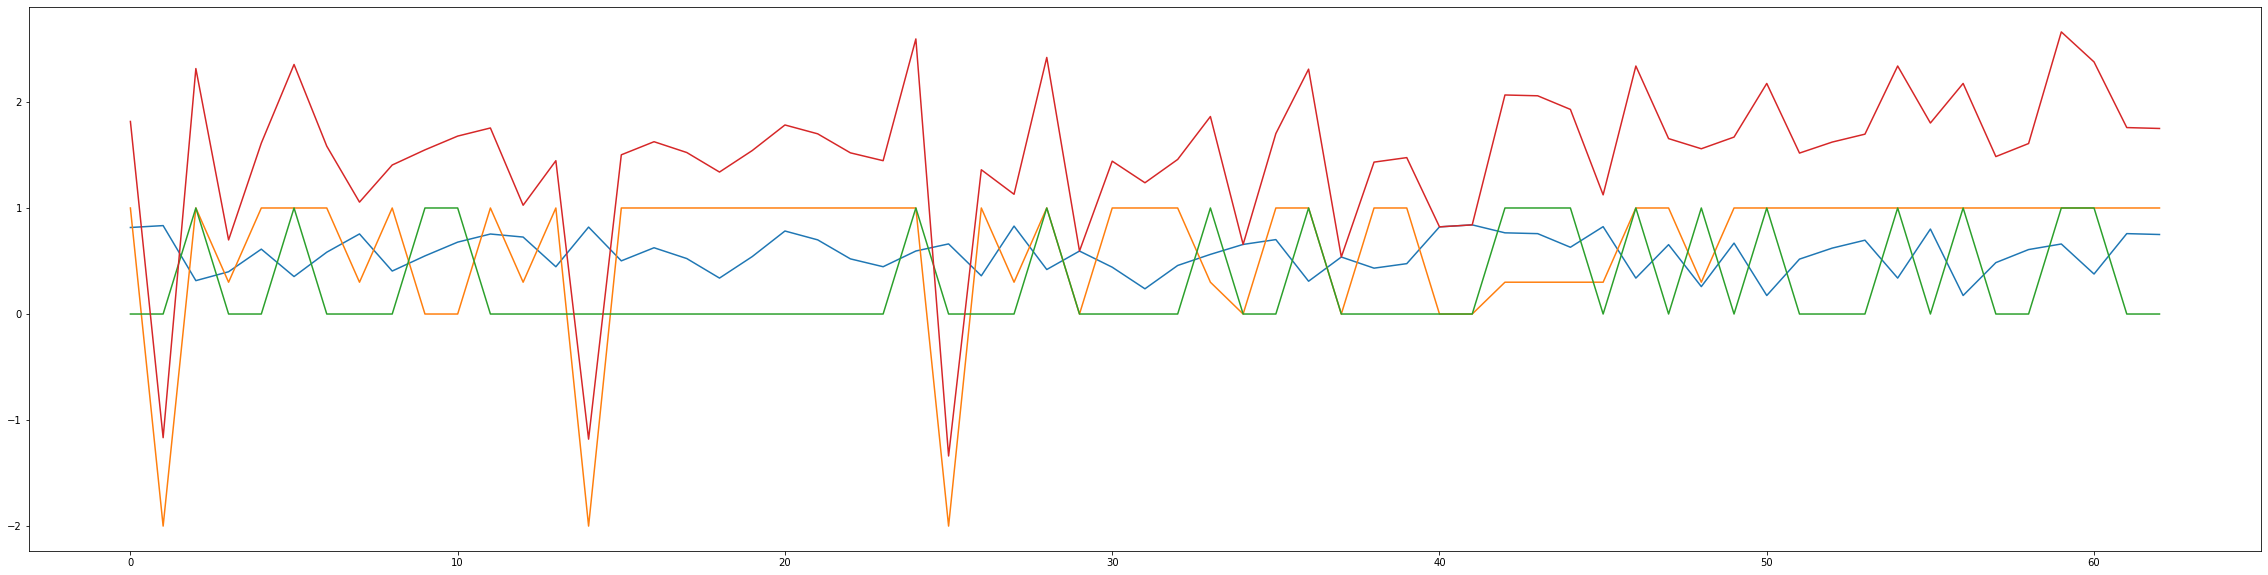

In [189]:
plt.plot(np.arange(63), gb_product_id_marketplace['price_tendency'].values)
plt.plot(np.arange(63), gb_product_id_marketplace['quantity_tendency'].values)
plt.plot(np.arange(63), gb_product_id_marketplace['ahead_tendency'].values)
plt.plot(np.arange(63), gb_product_id_marketplace['total_tendency'].values)

plt.show()

In [190]:
gb_product_id_marketplace['total_tendency'].describe()

count    63.000000
mean      1.489156
std       0.776560
min      -1.338794
25%       1.382885
50%       1.582972
75%       1.808668
max       2.660516
Name: total_tendency, dtype: float64

In [191]:
def predict(gb_product_id):
    total_res = 0
    for i in range(len(gb_product_id)):
#         next_change_amount = get_tendency(gb_product_id.iloc[i].origin_price, gb_product_id.iloc[i].price) * gb_product_id.iloc[i].total_change_amount
#         next_change_amount = get_new_tendency(gb_product_id.iloc[i].tendency) * gb_product_id.iloc[i].total_change_amount
        next_change_amount = gb_product_id.iloc[i].total_tendency / abs(gb_product_id.iloc[i].total_tendency) * gb_product_id.iloc[i].total_change_amount
#         if gb_product_id.iloc[i].origin_price > gb_product_id.iloc[i].price * 1.5:
#             next_change_amount = gb_product_id.iloc[i].total_change_amount
#         elif gb_product_id.iloc[i].origin_price * random.randint(30, 40) / 20 < gb_product_id.iloc[i].price:
#             next_change_amount = -gb_product_id.iloc[i].total_change_amount
        
        next_total_amount = gb_product_id.iloc[i].total_amount + next_change_amount
        
        next_price = next_total_amount // gb_product_id.iloc[i].quantity
        gb_product_id.iloc[i, gb_product_id.columns.get_loc('next_price')] = next_price
        gb_product_id.iloc[i, gb_product_id.columns.get_loc('next_total_amount')] = next_total_amount
        
        total_res += gb_product_id.iloc[i].total_amount - gb_product_id.iloc[i].next_total_amount
    return total_res, gb_product_id

In [192]:
total_res, res = predict(gb_product_id_marketplace)
total_res

-11467.0

In [193]:
res

,quantity,auto_stock_amount,price,origin_price,change_amount,total_change_amount,total_amount,ahead,ahead_tendency,quantity_tendency,price_tendency,store_quantity,next_price,next_total_amount,total_tendency
product_id,,,,,,,,,,,,,,,
10498,3,20,577,1200,24,72,1731,-26.0,0,1.0,0.815977,0,601,1803,1.815977
10499,15,17,911,2000,60,900,13665,-19.0,0,-2.0,0.833811,0,851,12765,-1.166189
10500,1,14,2727,3200,120,120,2727,-4.0,1,1.0,0.314829,0,2847,2847,2.314829
10501,1,1,7277,9000,150,150,7277,-12.0,0,0.3,0.398696,0,7427,7427,0.698696
10528,2,110,474,700,16,32,948,-15.0,0,1.0,0.611827,0,490,980,1.611827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,5,50,544,800,16,80,2720,-16.0,0,1.0,0.607870,0,560,2800,1.607870
10905,1,3,3200,5000,200,200,3200,-9.0,1,1.0,0.660516,0,3400,3400,2.660516
10906,1,35,984,1200,24,24,984,-9.0,1,1.0,0.377263,0,1008,1008,2.377263


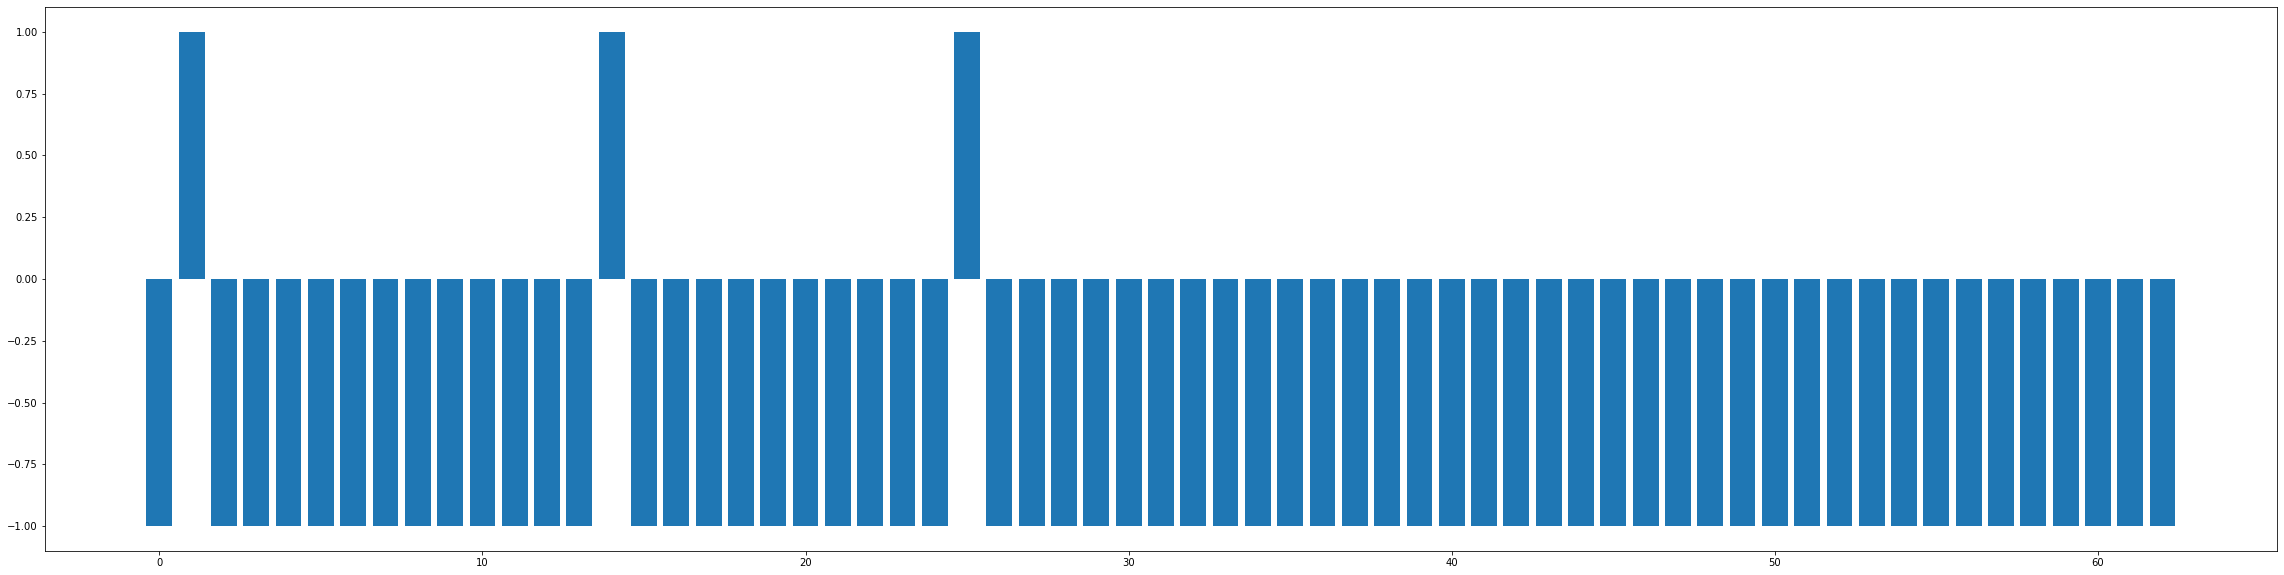

In [194]:
gb_product_id_marketplace["is_plus"] = gb_product_id_marketplace.total_amount > gb_product_id_marketplace.next_total_amount
gb_product_id_marketplace["is_plus"] = gb_product_id_marketplace["is_plus"].replace(False, -1)
gb_product_id_marketplace["is_plus"] = gb_product_id_marketplace["is_plus"].replace(True, 1)
plt.rcParams['figure.figsize'] = [40, 10]
plt.bar(np.arange(len(gb_product_id_marketplace)), gb_product_id_marketplace["is_plus"])
plt.show()

In [195]:
min_offset = -500
max_offset = 0

def new_after_prediction(result):
    offset = result.total_amount.sum() - result.next_total_amount.sum()
    offset_index, break_point = -1, -1
    
    while(True):
        if offset > min_offset and offset < max_offset:
            break
        
        offset_index += 1
        break_point += 1
        
        if break_point == len(result):
            break
        
        if offset_index == len(result):
            shuffle_index = np.random.permutation(len(result))
            result = result.iloc[shuffle_index]
            offset_index, break_point = 0, 0
        
        if abs(result.iloc[offset_index].total_tendency) > 1.8 and random.randint(0, 10) > 3:
            continue
        
        if offset < min_offset:
            if result.iloc[offset_index].next_price > result.iloc[offset_index].price:
                break_point = 0
                result.iloc[offset_index, result.columns.get_loc('next_price')] = result.iloc[offset_index].price - result.iloc[offset_index].change_amount
                result.iloc[offset_index, result.columns.get_loc('next_total_amount')] = result.iloc[offset_index].total_amount - result.iloc[offset_index].total_change_amount

        if offset > max_offset:
            if result.iloc[offset_index].next_price < result.iloc[offset_index].price:
                break_point = 0
                result.iloc[offset_index, result.columns.get_loc('next_price')] = result.iloc[offset_index].price +  result.iloc[offset_index].change_amount
                result.iloc[offset_index, result.columns.get_loc('next_total_amount')] = result.iloc[offset_index].total_amount +  result.iloc[offset_index].total_change_amount
    
        offset = result.total_amount.sum() - result.next_total_amount.sum()
        
    return result

In [196]:
final_res = new_after_prediction(res)

In [197]:
final_res.total_amount.sum() - final_res.next_total_amount.sum()

-247

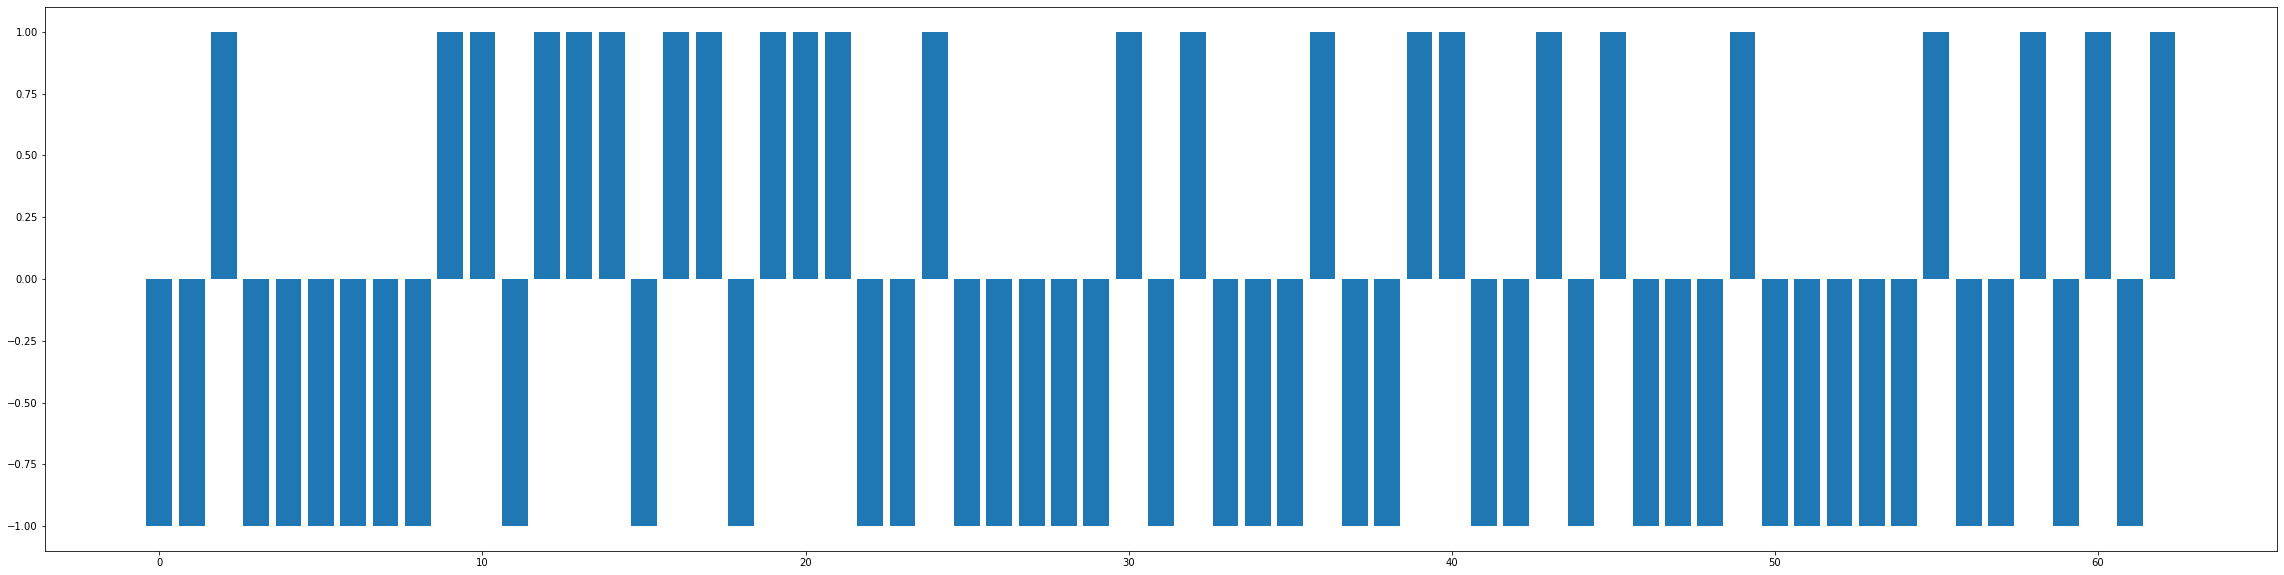

In [198]:
final_res["is_plus"] = final_res.total_amount > final_res.next_total_amount
final_res["is_plus"] = final_res["is_plus"].replace(False, -1)
final_res["is_plus"] = final_res["is_plus"].replace(True, 1)
plt.rcParams['figure.figsize'] = [40, 10]
plt.bar(np.arange(len(final_res)), final_res["is_plus"])
plt.show()

In [199]:
final_res

,quantity,auto_stock_amount,price,origin_price,change_amount,total_change_amount,total_amount,ahead,ahead_tendency,quantity_tendency,price_tendency,store_quantity,next_price,next_total_amount,total_tendency,is_plus
product_id,,,,,,,,,,,,,,,,
10850,25,400,425,700,14,350,10625,-20.0,0,1.0,0.699424,0,439,10975,1.699424,-1
10904,5,50,544,800,16,80,2720,-16.0,0,1.0,0.607870,0,560,2800,1.607870,-1
10544,1,45,279,400,5,5,279,-25.0,0,1.0,0.582972,0,274,274,1.582972,1
10869,1,60,684,800,16,16,684,-8.0,1,1.0,0.309232,0,700,700,2.309232,-1
10880,5,6,1654,3500,156,780,8270,-12.0,0,0.0,0.821975,0,1810,9050,0.821975,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10830,6,400,322,400,5,30,1932,-16.0,0,1.0,0.405268,0,317,1902,1.405268,1
10905,1,3,3200,5000,200,200,3200,-9.0,1,1.0,0.660516,0,3400,3400,2.660516,-1
10847,3,400,336,400,5,15,1008,-13.0,0,1.0,0.338828,8,331,993,1.338828,1


In [12]:
shuffle_index = np.random.permutation(len(gb_product_id_marketplace))
shuffle_index

array([31, 19,  0,  4,  9,  3, 35,  6, 13, 26, 37, 20, 33, 36, 34, 15, 16,
       32, 17, 23, 25, 38,  8, 39, 24, 11, 30, 29,  7, 21, 12, 27, 28, 14,
       10, 40,  1,  5, 18,  2, 22])

In [13]:
gb_product_id_marketplace = gb_product_id_marketplace.iloc[shuffle_index]
gb_product_id_marketplace

,quantity,price,origin_price,change_amount,total_change_amount,total_amount,ahead,next_price,next_total_amount,tendency
product_id,,,,,,,,,,
10869,2,812,800,16,32,1624,0.0,0,0,-0.107072
10852,2,1110,1100,22,44,2220,0.0,0,0,-0.065050
10498,18,1201,1200,24,432,21618,0.0,0,0,-0.005971
10528,2,730,800,16,32,1460,-5.0,0,0,0.555976
10832,2,7967,8000,320,640,15934,-1.0,0,0,0.029550
10501,1,7577,8000,150,150,7577,-3.0,0,0,0.361736
10880,6,3358,3500,156,936,20148,-1.0,0,0,0.282796
10616,4,3416,3500,140,560,13664,-1.0,0,0,0.170299
10844,5,445,450,5,25,2225,-1.0,0,0,0.079450


In [14]:
gb_product_id_marketplace.iloc[0].name

10869

In [15]:
import math

In [16]:
def get_tendency_graph(x, min_te = 0.33, max_te = 0.5):
    x_scale = 300
    if x_scale * -min_te >= x:
        return 0
    elif x_scale * max_te <= x:
        return 0
    elif 0 > x:
        y = (x + min_te * x_scale) * (x + min_te * x_scale) / (min_te * x_scale * min_te * x_scale) * 10
        return y
    else:
        y = (x - max_te * x_scale) * (x - max_te * x_scale) / (max_te * x_scale * max_te * x_scale) * 10
        return y

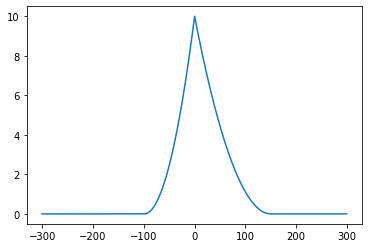

In [17]:
x = np.arange(-300, 300)
Y = []
for i in range(-300, 300):
    Y.append(get_tendency_graph(i))

plt.plot(x, Y)

In [18]:
def get_random(negative = random.randint(-10, -1), positive = random.randint(1, 10)):
    k = random.randint(negative, positive)
    while k == 0:
        k = random.randint(negative, positive)
    return k / abs(k)

In [19]:
def get_tendency(origin_price, price, min_te = 0.33, max_te = 0.5):
    if origin_price * (1 - min_te) >= price:
        return 1
    elif origin_price * (1 + max_te) >= price:
        return -1
    elif origin_price > price:
        x = (price - origin_price + min_te * origin_price) * (price - origin_price + min_te * origin_price) // (min_te * origin_price * min_te * origin_price) * -10 - 1
        return get_random(x, 10)
    else:
        x = (price - origin_price - max_te * origin_price) * (price - origin_price - max_te * origin_price) // (max_te * origin_price * max_te * origin_price) * 10 + 1
        return get_random(-10, x)

In [59]:
def get_new_tendency(tendency_value):
    if tendency_value < 0:
        k = random.randint(-10, (int)((tendency_value + 1) * 10 - 1))
        while k == 0:
            k = random.randint(-10, (int)((tendency_value + 1) * 10 - 1))
    if tendency_value > 0:
        k = random.randint((int)((tendency_value - 1) * 10 + 1), 10)
        while k == 0:
            k = random.randint((int)((tendency_value - 1) * 10 + 1), 10)
    return k / abs(k)

In [60]:
def predict(gb_product_id):
    total_res = 0
    for i in range(len(gb_product_id)):
#         next_change_amount = get_tendency(gb_product_id.iloc[i].origin_price, gb_product_id.iloc[i].price) * gb_product_id.iloc[i].total_change_amount
        next_change_amount = get_new_tendency(gb_product_id.iloc[i].tendency) * gb_product_id.iloc[i].total_change_amount
        
#         if gb_product_id.iloc[i].origin_price > gb_product_id.iloc[i].price * 1.5:
#             next_change_amount = gb_product_id.iloc[i].total_change_amount
#         elif gb_product_id.iloc[i].origin_price * random.randint(30, 40) / 20 < gb_product_id.iloc[i].price:
#             next_change_amount = -gb_product_id.iloc[i].total_change_amount
        
        next_total_amount = gb_product_id.iloc[i].total_amount + next_change_amount
        
        next_price = next_total_amount // gb_product_id.iloc[i].quantity
        gb_product_id.iloc[i, gb_product_id.columns.get_loc('next_price')] = next_price
        gb_product_id.iloc[i, gb_product_id.columns.get_loc('next_total_amount')] = next_total_amount
        
        total_res += gb_product_id.iloc[i].total_amount - gb_product_id.iloc[i].next_total_amount
    return total_res, gb_product_id

In [61]:
min_offset = -500
max_offset = 500

def new_after_prediction(result):
    offset = result.total_amount.sum() - result.next_total_amount.sum()
    offset_index, break_point = -1, -1
    
    while(True):
        if offset > min_offset and offset < max_offset:
            break
        
        offset_index += 1
        break_point += 1
        
        if break_point == len(result):
            break
        
        if offset_index == len(result):
            shuffle_index = np.random.permutation(len(result))
            result = result.iloc[shuffle_index]
            offset_index, break_point = 0, 0
        
        if abs(result.iloc[offset_index].tendency) == 1 or abs(result.iloc[offset_index].ahead) > 7:
            continue
        
        if offset < min_offset:
            if result.iloc[offset_index].next_price > result.iloc[offset_index].price:
                break_point = 0
                result.iloc[offset_index, result.columns.get_loc('next_price')] = result.iloc[offset_index].price - result.iloc[offset_index].change_amount
                result.iloc[offset_index, result.columns.get_loc('next_total_amount')] = result.iloc[offset_index].total_amount - result.iloc[offset_index].total_change_amount

        if offset > max_offset:
            if result.iloc[offset_index].next_price < result.iloc[offset_index].price:
                break_point = 0
                result.iloc[offset_index, result.columns.get_loc('next_price')] = result.iloc[offset_index].price +  result.iloc[offset_index].change_amount
                result.iloc[offset_index, result.columns.get_loc('next_total_amount')] = result.iloc[offset_index].total_amount +  result.iloc[offset_index].total_change_amount
    
        offset = result.total_amount.sum() - result.next_total_amount.sum()
        
    return result

In [62]:
min_offset = -200
max_offset = 100
ban_product_ids = []
def after_prediction(gb_product_id):
    offset = gb_product_id.total_amount.sum() - gb_product_id.next_total_amount.sum()
    break_point, offset_index, sorted_index, first, second, third = 0, 0, 0, 0, 0, 0

    gb_product_id = gb_product_id.sort_values(by="total_change_amount", ascending=False)

    while offset < min_offset or break_point < len(gb_product_id):
        if offset < min_offset:
            break_point = 0
            offset_index = random.randint(0, len(gb_product_id) - 1)
            if random.randint(0, 100) < random.randint(30, 80):
                continue
            if gb_product_id.iloc[offset_index].tendency == 1:
                ban_product_ids.append(gb_product_id.iloc[offset_index].name)
                continue
            if gb_product_id.iloc[offset_index].origin_price > gb_product_id.iloc[offset_index].price * 1.5:
                third += 1
                if random.randint(0, third) < 7:
                    continue
            if gb_product_id.iloc[offset_index].next_price > gb_product_id.iloc[offset_index].price:
                gb_product_id.iloc[offset_index, gb_product_id.columns.get_loc('next_price')] = gb_product_id.iloc[offset_index].price - gb_product_id.iloc[offset_index].change_amount
                gb_product_id.iloc[offset_index, gb_product_id.columns.get_loc('next_total_amount')] = gb_product_id.iloc[offset_index].total_amount - gb_product_id.iloc[offset_index].total_change_amount
                offset = gb_product_id.total_amount.sum() - gb_product_id.next_total_amount.sum()
            
            offset_index = random.randint(0, len(gb_product_id) - 1)
        elif offset < max_offset:
            print(offset)
            break
        elif offset > min_offset:
            if gb_product_id.iloc[sorted_index].next_price < gb_product_id.iloc[sorted_index].price:
                if offset - gb_product_id.iloc[sorted_index].total_change_amount * 2 - min_offset > 0:
                    break_point = 0
                    if random.randint(first, first + 10) < 10:
                        gb_product_id.iloc[sorted_index, gb_product_id.columns.get_loc('next_price')] = gb_product_id.iloc[sorted_index].price + gb_product_id.iloc[sorted_index].change_amount
                        gb_product_id.iloc[sorted_index, gb_product_id.columns.get_loc('next_total_amount')] = gb_product_id.iloc[sorted_index].total_amount + gb_product_id.iloc[sorted_index].total_change_amount
                        offset = gb_product_id.total_amount.sum() - gb_product_id.next_total_amount.sum()
                        break_point = 0
                        first += 8 - second
                        second += 1
                    else:
                        first = max(first - 6, 0)
            sorted_index = (sorted_index + 1) % len(gb_product_id)    
            break_point += 1
        
        if break_point == len(gb_product_id):
            print(break_point, offset)
            break

    return gb_product_id

In [99]:
gb_product_id_marketplace["is_plus"] = 0
temp, temp_offset, index = 0, 10000, 0
offset = 1000
while((offset < -500 or offset > 500) and index < 10):
    median_res = predict(gb_product_id_marketplace)
    offset = median_res[1].total_amount.sum() - median_res[1].next_total_amount.sum()
    index += 1
    if abs(temp_offset) > abs(offset):
        temp = median_res[1].copy()
        temp_offset = offset
print(offset)

2591


In [100]:
temp.total_amount.sum() - temp.next_total_amount.sum()

561

In [53]:
gb_product_id_marketplace = gb_product_id_marketplace.sort_values(by="total_change_amount", ascending=False)
gb_product_id_marketplace

,quantity,price,origin_price,change_amount,total_change_amount,total_amount,ahead,next_price,next_total_amount,tendency,is_plus
product_id,,,,,,,,,,,
10831,5,8006,8000,320,1600,40030,0.0,8326,41630,-0.005374,0
10500,11,3207,3200,120,1320,35277,0.0,3087,33957,-0.015673,0
10885,2,11639,12000,600,1200,23278,-1.0,12239,24478,0.212287,0
10499,17,2051,2000,60,1020,34867,0.0,1991,33847,-0.180716,0
10881,6,3437,3500,160,960,20622,-1.0,3597,21582,0.128270,0
10880,6,3358,3500,156,936,20148,-1.0,3202,19212,0.282796,0
10854,3,7100,7200,288,864,21300,-1.0,6812,20436,0.099195,0
10856,2,9823,10000,400,800,19646,-1.0,10223,20446,0.126155,0
10832,2,7967,8000,320,640,15934,-1.0,8287,16574,0.029550,0


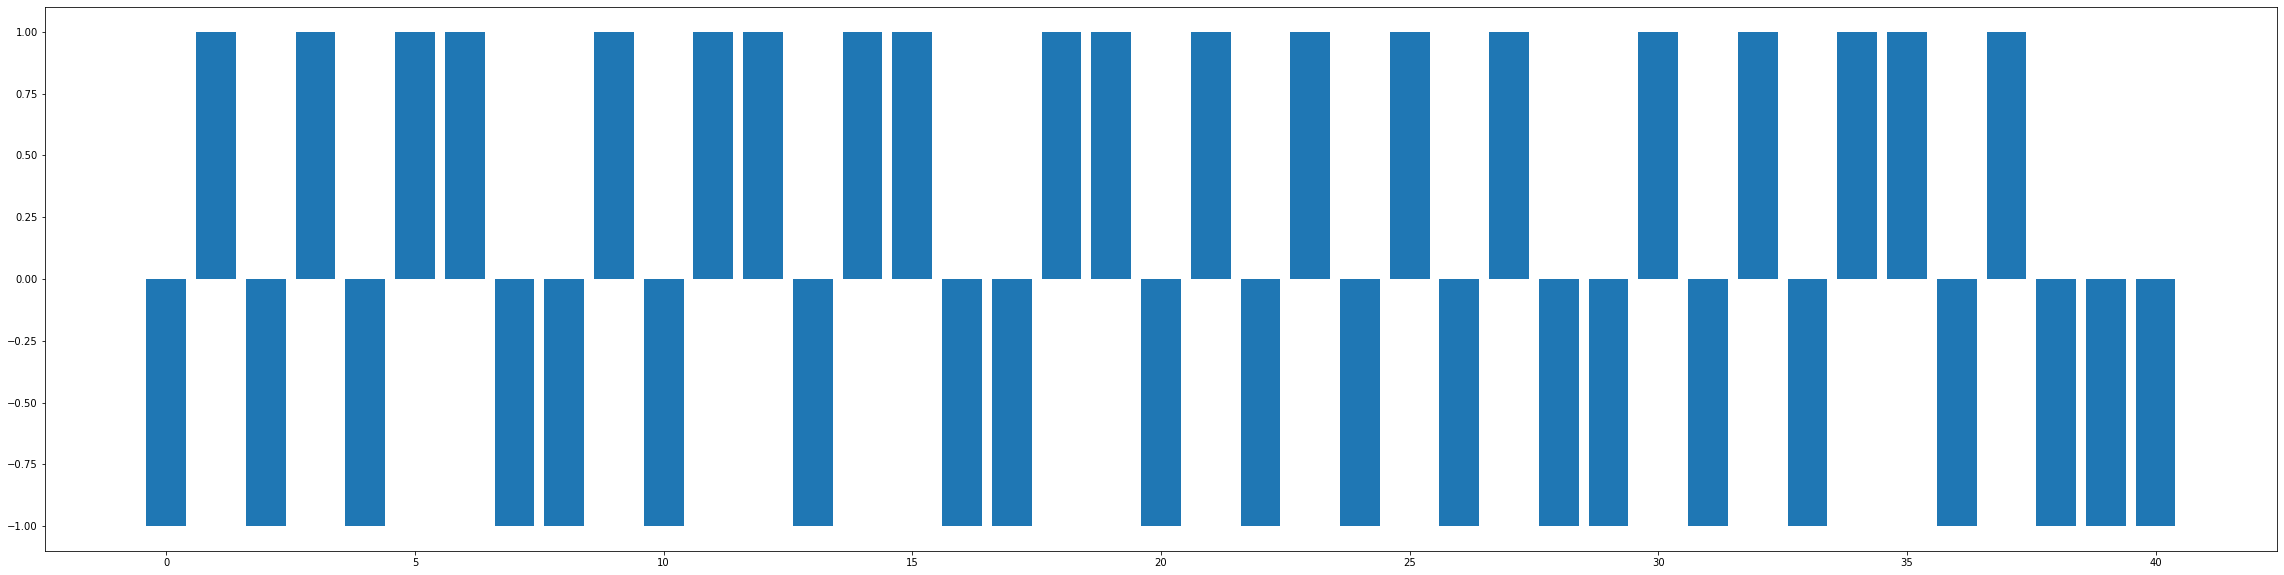

In [54]:
gb_product_id_marketplace["is_plus"] = gb_product_id_marketplace.total_amount > gb_product_id_marketplace.next_total_amount
gb_product_id_marketplace["is_plus"] = gb_product_id_marketplace["is_plus"].replace(False, -1)
gb_product_id_marketplace["is_plus"] = gb_product_id_marketplace["is_plus"].replace(True, 1)
plt.rcParams['figure.figsize'] = [40, 10]
plt.bar(np.arange(len(gb_product_id_marketplace)), gb_product_id_marketplace["is_plus"])
plt.show()

In [55]:
gb_product_id_marketplace

,quantity,price,origin_price,change_amount,total_change_amount,total_amount,ahead,next_price,next_total_amount,tendency,is_plus
product_id,,,,,,,,,,,
10831,5,8006,8000,320,1600,40030,0.0,8326,41630,-0.005374,-1
10500,11,3207,3200,120,1320,35277,0.0,3087,33957,-0.015673,1
10885,2,11639,12000,600,1200,23278,-1.0,12239,24478,0.212287,-1
10499,17,2051,2000,60,1020,34867,0.0,1991,33847,-0.180716,1
10881,6,3437,3500,160,960,20622,-1.0,3597,21582,0.128270,-1
10880,6,3358,3500,156,936,20148,-1.0,3202,19212,0.282796,1
10854,3,7100,7200,288,864,21300,-1.0,6812,20436,0.099195,1
10856,2,9823,10000,400,800,19646,-1.0,10223,20446,0.126155,-1
10832,2,7967,8000,320,640,15934,-1.0,8287,16574,0.029550,-1


In [56]:
median_res[1].total_amount.sum() - median_res[1].next_total_amount.sum()

-113

In [29]:
final_res = new_after_prediction(median_res[1])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_496548\2384776747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_res["is_plus"] = final_res.total_amount > final_res.next_total_amount
C:\Users\Administrator\AppData\Local\Temp\ipykernel_496548\2384776747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_res["is_plus"] = final_res["is_plus"].replace(False, -1)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_496548\2384776747.py:3: SettingWithCopyWarning: 
A value is trying to be set 

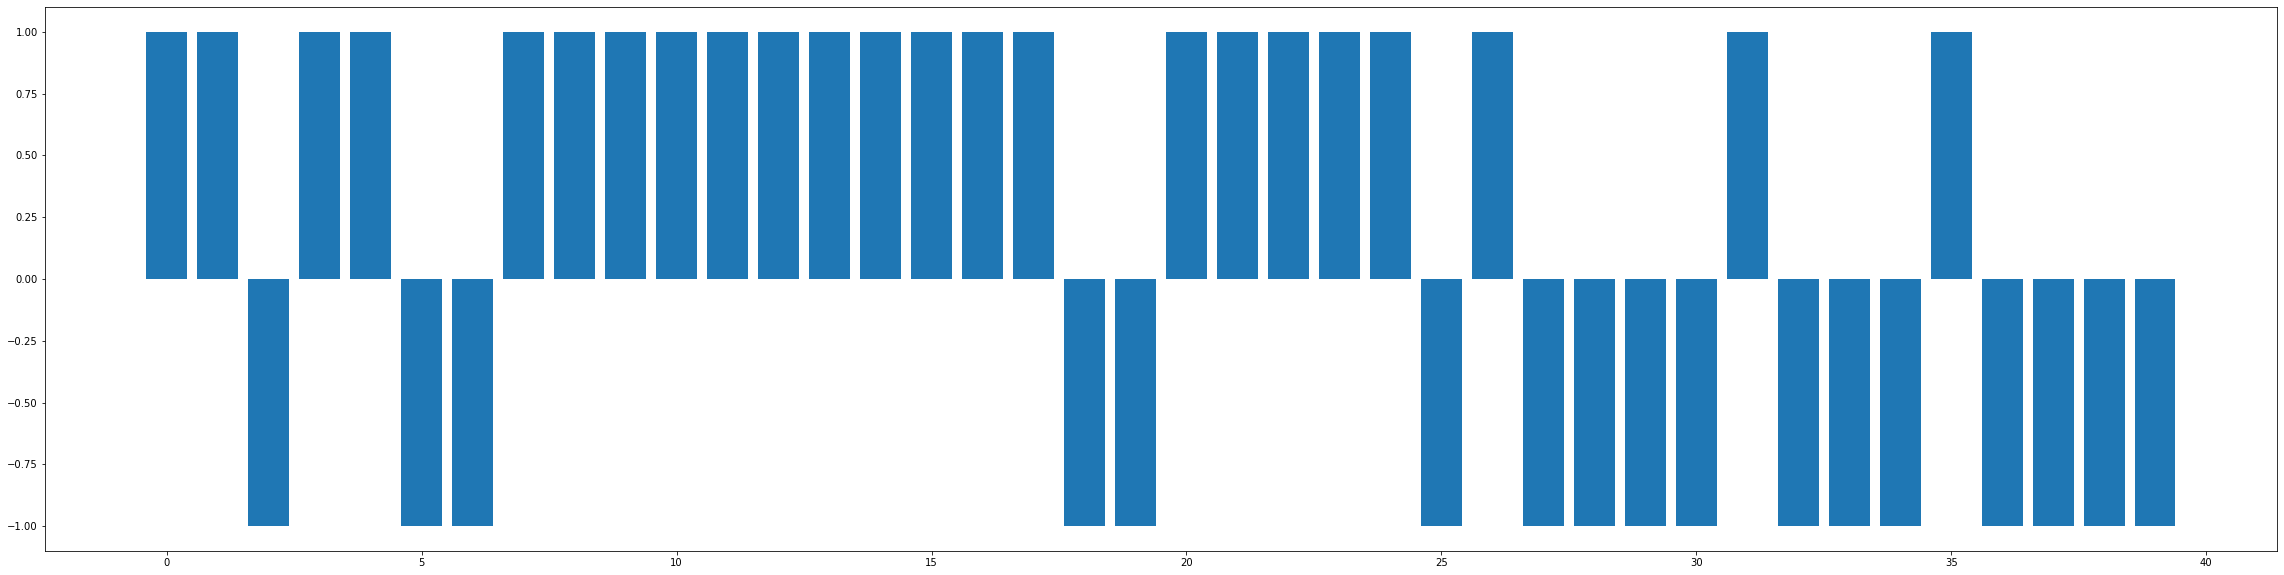

In [30]:
final_res["is_plus"] = final_res.total_amount > final_res.next_total_amount
final_res["is_plus"] = final_res["is_plus"].replace(False, -1)
final_res["is_plus"] = final_res["is_plus"].replace(True, 1)
plt.rcParams['figure.figsize'] = [40, 10]
plt.bar(np.arange(len(final_res)), final_res["is_plus"])
plt.show()

In [31]:
offset = final_res.total_amount.sum() - final_res.next_total_amount.sum()
offset

-327

In [32]:
final_res.total_amount.sum()

406922

In [33]:
final_res.next_total_amount.sum()

407249

In [34]:
final_res["offset"] = final_res["is_plus"] * final_res["total_change_amount"]
final_res.describe()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_496548\3270889021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_res["offset"] = final_res["is_plus"] * final_res["total_change_amount"]


,quantity,price,origin_price,change_amount,total_change_amount,total_amount,ahead,next_price,next_total_amount,tendency,is_plus,offset
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,9.575000,2738.425000,2826.250000,96.125000,308.425000,10173.050000,-2.600000,2701.800000,10181.225000,0.247040,0.150000,-8.175000
std,14.271879,3604.512705,3472.326263,147.137854,361.558371,10311.195471,8.589797,3485.521667,10429.711534,0.627914,1.001281,477.724837
min,1.000000,165.000000,200.000000,2.000000,5.000000,469.000000,-18.000000,167.000000,464.000000,-1.000000,-1.000000,-1220.000000
25%,2.000000,590.500000,700.000000,14.000000,64.000000,3204.500000,-7.000000,579.250000,3137.500000,-0.150750,-1.000000,-133.500000
50%,4.000000,1282.000000,1100.000000,22.000000,141.000000,6951.000000,-2.500000,1257.500000,7098.500000,0.338379,1.000000,28.500000
75%,10.250000,3332.500000,3925.000000,142.500000,471.000000,12209.750000,0.250000,3360.500000,11926.500000,0.727874,1.000000,143.000000
max,61.000000,17143.000000,15000.000000,600.000000,1600.000000,50874.000000,23.000000,16543.000000,52094.000000,1.000000,1.000000,1600.000000


In [35]:
final_res

,quantity,price,origin_price,change_amount,total_change_amount,total_amount,ahead,next_price,next_total_amount,tendency,is_plus,offset
product_id,,,,,,,,,,,,
10882,1,3122,3000,100,100,3122,1.0,3022,3022,-0.283424,1,100
10830,5,532,450,5,25,2660,16.0,527,2635,-1.000000,1,25
10867,18,165,200,2,36,2970,-18.0,167,3006,1.000000,-1,-36
10845,4,822,800,16,64,3288,1.0,806,3224,-0.194543,1,64
10884,2,4541,5000,200,400,9082,-3.0,4341,8682,0.576899,1,400
10881,6,2957,4000,160,960,17742,-7.0,3117,18702,1.000000,-1,-960
10873,4,352,400,4,16,1408,-12.0,356,1424,0.696192,-1,-16
10846,12,1344,1500,30,360,16128,-6.0,1314,15768,0.632290,1,360
10869,4,764,800,16,64,3056,-3.0,748,2992,0.311723,1,64
